# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?


1. Dataset Chosen : bookReviewsData.csv (Book Reviews dataset from Amazon)

2. Predicted Goal (Label): I will be predicting whether a book review is postiive or nagative. The label is the Positive Review column, which. is a boolean (True = positive, False = negative).

3. Type of ML Problem: This is a supervised learning problem because we are working with labeled data. It is a classification task -- specifically, a binary classification problem since there are only two possible outputs: positive or negative.

4. Features: The primary feature is the text content of the review (Review column). I will later convert this into numerical features using TF-IDF vectorization. Additional preprocessing and feature engineering (e.g., review length) may be considered based on EDA.

5. Why this problem matters: Predicting sentiment in book reviews is valuable for both readers and publishers. A model like this can help automatically flag or summarize review sentiment, improve recommendation systems, detect fake or misleading reviews, and provide insights into customer satisfaction trends. For companies like Amazon, this kind of model can enhance the user experience and drive better product visibility and engagement.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


False    993
True     980
Name: Positive Review, dtype: int64


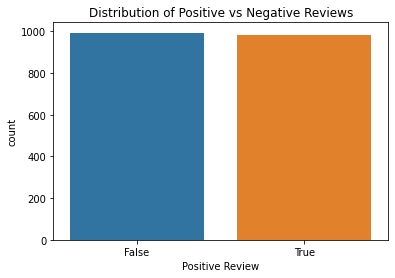

In [4]:
# count how many True (positive) vs False (negative) reviews there are
print(df['Positive Review'].value_counts())

# visualize the class distribution using a bar chart
sns.countplot(data=df, x = 'Positive Review')
plt.title("Distribution of Positive vs Negative Reviews")
plt.show()

In [5]:
# add column for the number of characters in each review
df['review_length'] = df['Review'].apply(len)

# add a column for the number of words in each review
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))

In [6]:
# show summary stats like mean, min, max for review length and word count
print(df[['review_length', 'word_count']].describe())

       review_length   word_count
count    1973.000000  1973.000000
mean      933.336036   160.943234
std      1450.187183   236.136329
min        59.000000    11.000000
25%       331.000000    59.000000
50%       586.000000   103.000000
75%      1065.000000   183.000000
max     32467.000000  5167.000000


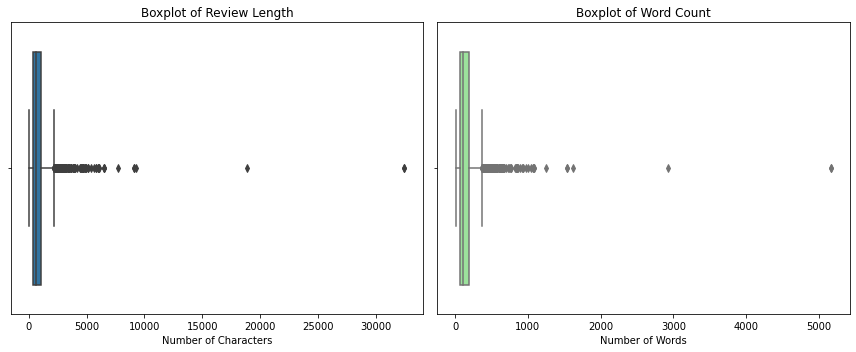

In [7]:
#create figure with 2 subplots side by side
plt.figure(figsize=(12, 5))

# boxplot for review length
plt.subplot(1, 2, 1)
sns.boxplot(x=df['review_length'])
plt.title('Boxplot of Review Length')
plt.xlabel('Number of Characters')

# boxplot for word count
plt.subplot(1,2,2)
sns.boxplot(x=df['word_count'], color = 'lightgreen')
plt.title('Boxplot of Word Count')
plt.xlabel('Number of Words')

plt.tight_layout()
plt.show()

## Left plot (review length): Most reviews are under ~2000 characters, but few go way beyon 10000+ characters
## Right plot (word count): most reviews are under ~300 words, but few reach over well 1000 or even 5000 words

In [8]:
# Optional step to cap extreme outliers using the 99th percentile
length_cap = df['review_length'].quantile(0.99)
word_cap = df['word_count'].quantile(0.99)

df['review_length'] = np.where(df['review_length'] > length_cap, length_cap, df['review_length'])
df['word_count'] = np.where(df['word_count'] > word_cap, word_cap, df['word_count'])

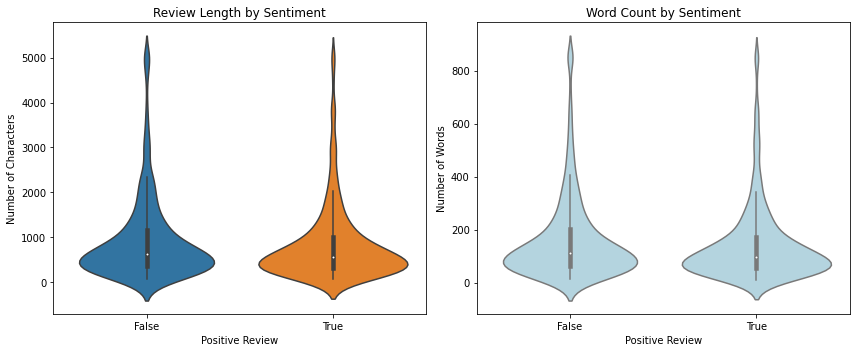

In [9]:
plt.figure(figsize=(12, 5))

# violin plot for review length vs. sentiment
plt.subplot(1,2,1)
sns.violinplot(data=df, x= 'Positive Review', y = 'review_length')
plt.title('Review Length by Sentiment')
plt.xlabel('Positive Review')
plt.ylabel('Number of Characters')

# violin plot for word count vs. sentiment
plt.subplot(1,2,2)
sns.violinplot(data=df, x = 'Positive Review', y = 'word_count', color = 'lightblue')
plt.title('Word Count by Sentiment')
plt.xlabel('Positive Review')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()

## left plot: both positive and negative reviews show similar central tendencies
## there's longer tail for positive review, suggesting some very long positive reviews
## distribution is slightly wider for positive revies at higher character range.

## right plot: this confirm psitive reviews ten to have more extreme high values.
## but bulk of both classes cluster around similar word counts

               review_length  word_count
review_length       1.000000    0.996851
word_count          0.996851    1.000000


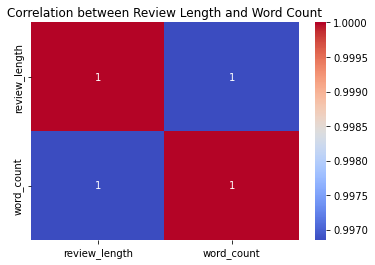

In [10]:
# check correlation between review_length and word_count
correlation = df[['review_length', 'word_count']].corr()
print(correlation)

# heatmap for correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Length and Word Count')
plt.show()

## review_length and word_count are highly correlated (0.997) -> convey almost same info

In [11]:
# longest review
print("Longest Review:")
print(df.loc[df['review_length'].idxmax(), 'Review'])
# longest positive review
print(df[df['Positive Review'] == True].sort_values(by='review_length', ascending=False).iloc[0]['Review'])

# shortest review
print("\nShortest Review:")
print(df.loc[df['review_length'].idxmin(), 'Review'])
# shortest positive review
print(df[df['Positive Review'] == False].sort_values(by='review_length').iloc[0]['Review'])

Longest Review:
``People  say again and again that philosophy  doesn't really progress, that we  arestill occupied  with the same philosophical problems as were  theGreeks.But  the people who say this don't understand why ishas to be  so. It is becauseour language has remained the same and  keeps seducing us  into asking the same questions.  As longas there continues to be a verb  'to be' that  looks as if it functions in the same way as 'to eat' and  'to  drink', as long as we stillhavethe adjectives  'identical', 'true',  'false', 'possible',as  long as we continueto talk of a river of time, of  an expanseof  space, etc., etc., people will keepstumbling over the  samepuzzling  difficulties and find themselves staring atsomethingwhich  no explanation seems capable of clearing up.And what'smore,this  satisfies  a longing for the transcendent, because, insofar  as peoplethinkthey can  see `the limits of h

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

### Feature Selection
After exploring the data, I chose to retain the Review column as the main input feature for natural language processing. Although I created two engineered feature -- review_length and word_count -- I will remove them before modeling because they are highly correlated (r ~ 0.997), and including both may introduce redundancy. Since this is a text classification task, I will transform the Review text using TF-IDF vectorization instead of using raw numerical length-based features.

### Data Prep Techniques
* Text Cleaning: I will apply TF-IDF vectorization to convert text into numerical feature vectors. I plan to use unigrams and bigrams (ngram_range=(1, 2)), and may adjust min_df to remove rare terms.
* Label Encoding: The target label Positive Review is already in boolean format, so no transformation is needed.
* Train/Validation/Test Split: I will split the data into training and validation sets using an 80/20 ratio, and reserve a separate test set to evaluate final model performance.

### Model Choice
I will use a neural network model (Keras Sequential) with: An input layer matching the TF-IDF feature size / One or more dense hidden layers with ReLU activation / A dropout layer to reduce overfitting / A final sigmoid output layer for binary classification.

If needed, I may compare this against a logistic regression baseline for performance comparison.

### Modeling Plan
I will first train the base neural network and evaluate its performance on the validation set using loss and accuracy.

I will then improve the model by: Adjusting hyperparameters like learning_rate, num_epochs, and hidden layer size / Adding regularization techniques like dropout / Tuning the TF-IDF vectorizer (e.g., min_df, max_features)

I will monitor training vs. validation loss and accuracy to detect overfitting or underfitting.

Final evaluation will be done on the test set using accuracy and qualitative inspection of predictions.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
# YOUR CODE HERE
# Text preprocessing and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Neural network modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For working with arrays
import numpy as np

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [13]:
# YOUR CODE HERE
# Prepare the data

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['Review']).toarray()
# Target variable
y = df['Positive Review'].astype(int)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Build neural network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

#Evaluate model on test data
loss, accuracy = nn_model.evaluate(X_test, y_test)
loss, accuracy


Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 0.6892 - accuracy: 0.5753 - val_loss: 0.6817 - val_accuracy: 0.6297
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6335 - accuracy: 0.8185 - val_loss: 0.6056 - val_accuracy: 0.7848
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.9231 - val_loss: 0.4651 - val_accuracy: 0.8070
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.9683 - val_loss: 0.4534 - val_accuracy: 0.8070
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0795 - accuracy: 0.9921 - val_loss: 0.4845 - val_accuracy: 0.8006
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9992 - val_loss: 0.5313 - val_accuracy: 0.7943
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.5755 - val_accuracy: 0.7848
Epoch 8/10
40/40 [==

(0.6899516582489014, 0.7645569443702698)

In [ ]:
# Train acc = 1.00, val acc ~ 0.79-0.81, test acc = 0.765
# val loss keep rising after epoch ~304

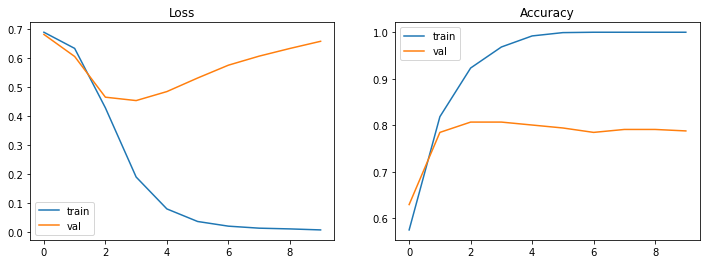

In [14]:
# plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy'); plt.legend()
plt.show()

left plot: training loss sharply decreases and flattens around epoch 405.
validation loss decreases briefly, then starts rising steadily, which is textbook overfitting pattern.
model is memorizing training data while struggling to generalize

right plot: training accuracy quickly climbs to near 100% 
validation accuracy plateaus early (~0.80) and decline slightly
strong sign of overfitting

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1
)

history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,   # increase to give callbacks room to act
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.6831 - val_accuracy: 0.7975
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.7072 - val_accuracy: 0.7880
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.7204 - val_accuracy: 0.7911


Training stopped after 3 epochs, due to no improvement in val_loss for 2 rounds (patience=2)

The model did not overfit badly — training stayed stable, and validation accuracy stayed around 0.79–0.80.

Training accuracy is still 100%, but validation accuracy peaked at 0.7975, which is consistent with earlier results.

ReduceLROnPlateau likely reduced learning rate after epoch 2, helping stabilize training.

In [16]:


loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


13/13 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.7595
Test Loss: 0.7170, Test Accuracy: 0.7595


In [18]:
# comparing with simpler model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.8152


### Part 5 Summary: Modeling & Evaluation

I prepared the data by converting review text into TF-IDF vectors with a 5000-word vocabulary and removed English stop words. Then I trained two classification models:

1. **Neural Network (2 hidden layers with dropout)**  
   - Training Accuracy: 100%  
   - Validation Accuracy: ~0.80 (peaked early)  
   - Test Accuracy: ~0.76  
   - Signs of overfitting were observed: training accuracy reached 1.0 quickly, while validation plateaued and then declined.  
   - Implemented `EarlyStopping` and `ReduceLROnPlateau`, which helped stabilize training.

2. **Logistic Regression (baseline model)**  
   - Test Accuracy: **0.8152**  
   - Outperformed the neural network in terms of generalization.

**Conclusion**:  
Despite the neural network’s complexity, logistic regression provided better test performance on this TF-IDF vectorized text classification task. This suggests that simple models can be quite effective with proper feature engineering.
